<a href="https://colab.research.google.com/github/CARLOS-DANIEL-GIL-GUZMAN/Taller-1/blob/main/4_Transformada_Laplace/2_PropiedadesLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Propiedades

La transformada de Laplace tiene una serie de propiedades específicas que pueden obtenerse  directamente a partir de su definición. Las más importantes en el contexto de señales y sistemas se revisan a continuación.

### Linealidad

La transformada de Laplace es una transformación lineal, como se puede concluir directamente de su definición. Para dos señales $x_1(t)$ y $x_2(t)$ con transformadas de Laplace $X_1(s) = \mathfrak{L} \{ x_1(t) \}$ y $X_2(s) = \mathfrak{L} \{ x_2(t) \}$, se tiene que:

\begin{equation}
\mathfrak{L} \{ A \cdot x_1(t) + B \cdot x_2(t) \} = A \cdot X_1(s) + B \cdot X_2(s)
\end{equation}
con $A, B \in \mathbb{C}$.

La región de convergencia (ROC) de la superposición $A x_1(t) + B x_2(t)$ incluye la intersección de las ROCs de $x_1(t)$ y $x_2(t)$:

\begin{equation}
\text{ROC} \{ A \cdot x_1(t) + B \cdot x_2(t) \} \supseteq \text{ROC} \{ x_1(t) \} \cap \text{ROC} \{ x_2(t) \}
\end{equation}

La transformada de Laplace de una superposición ponderada de señales es igual a la superposición ponderada de las transformadas de Laplace individuales. Esta propiedad es útil para derivar la transformada de Laplace de señales que pueden expresarse como superposición de otras señales cuyas transformadas de Laplace son conocidas o pueden calcularse más fácilmente.

#### Transformada de señales seno y coseno

La transformada de Laplace de una señal coseno causal $\epsilon(t) \cdot \cos(\omega_0 t)$ y una señal seno causal $\epsilon(t) \cdot \sin(\omega_0 t)$ se deriva de la expresión de un coseno/seno como una suma de señales armónicas exponenciales, utilizando la [fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula):

\begin{align}
\cos(\omega_0 t) &= \frac{1}{2} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) \\
\sin(\omega_0 t) &= \frac{1}{2j} \left( e^{j \omega_0 t} - e^{-j \omega_0 t} \right)
\end{align}

La transformada de Laplace de una [señal exponencial compleja causal](Definicion.ipynb#Transformation-of-the-Causal-Complex-Exponential-Signal) es

\begin{equation}
\mathfrak{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

Usando la linealidad de la transformada de Laplace:

\begin{equation}
\mathfrak{L} \{ \epsilon(t) \cdot \cos(\omega_0 t) \} =
\frac{1}{2} \left( \frac{1}{s - j \omega_0} + \frac{1}{s + j \omega_0} \right) = \frac{s}{s^2 + \omega_0^2}
\qquad \text{; para } \Re \{ s \} > 0
\end{equation}

y

\begin{equation}
\mathfrak{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \} =
\frac{1}{2j} \left( \frac{1}{s - j \omega_0} - \frac{1}{s + j \omega_0} \right) = \frac{\omega_0}{s^2 + \omega_0^2}
\qquad \text{; para } \Re \{ s \} > 0
\end{equation}

**Ejemplo - Transformada de una señal coseno**

La transformada de Laplace de una señal coseno causal se calcula con `Sympy`

In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#se definen las variables simbólicas y se aplica la función de laplace de sympy
t, w0 = sym.symbols('t omega0', real=True)
s = sym.symbols('s', complex=True)

x = sym.sin(w0*t)
X, a, cond = sym.laplace_transform(x, t, s)
X, a, cond

⎛   ω₀            ⎞
⎜────────, 0, True⎟
⎜  2    2         ⎟
⎝ω₀  + s          ⎠

**Ejercicio**

* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?

Transformada de Laplace de sin(ω₀t):
   ω₀   
────────
  2    2
ω₀  + s 
Polos simbólicos: [-I*omega0, I*omega0]
Ceros simbólicos: []


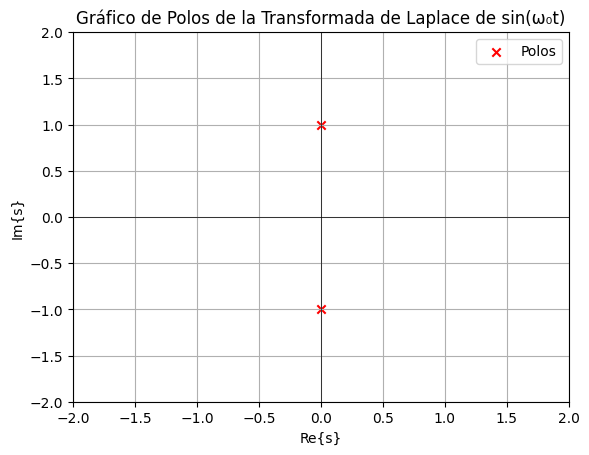

In [5]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# Inicializar la visualización de SymPy
sym.init_printing()

# Definir variables simbólicas
t, w0 = sym.symbols('t omega0', real=True)
s = sym.symbols('s', complex=True)

# Definir la función senoidal en el dominio del tiempo
x = sym.sin(w0 * t)

# Calcular la transformada de Laplace
X_s, a, cond = sym.laplace_transform(x, t, s)

# Mostrar la transformada de Laplace
print("Transformada de Laplace de sin(ω₀t):")
sym.pprint(X_s)

# Encontrar polos y ceros
polos_simb = sym.solve(sym.denom(X_s), s)
ceros_simb = sym.solve(sym.numer(X_s), s)

print("Polos simbólicos:", polos_simb)
print("Ceros simbólicos:", ceros_simb)

# Convertir polos y ceros simbólicos a valores numéricos (para graficar)
# Asumiendo que omega0 = 1 para fines de visualización
omega0_val = 1
polos = [complex(sym.re(polo.subs(w0, omega0_val)), sym.im(polo.subs(w0, omega0_val))) for polo in polos_simb]
ceros = [complex(sym.re(cero.subs(w0, omega0_val)), sym.im(cero.subs(w0, omega0_val))) for cero in ceros_simb]

# Gráfico de polos y ceros en el plano complejo
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Graficar polos
plt.scatter(np.real(polos), np.imag(polos), color='red', marker='x', label="Polos")

# Graficar ceros (si los hubiera)
if ceros:
    plt.scatter(np.real(ceros), np.imag(ceros), color='blue', marker='o', label="Ceros")

# Configurar el gráfico
plt.title("Gráfico de Polos de la Transformada de Laplace de sin(ω₀t)")
plt.xlabel("Re{s}")
plt.ylabel("Im{s}")
plt.grid(True)
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Mostrar gráfico
plt.show()

Para este caso, se pesenta una simetria IMPAR


### Simetría para señales reales

La transformada de Laplace del complejo conjugado $x^*(t)$ de una señal $x(t)$ está dada por:

\begin{equation}
\mathfrak{L} \{ x^*(t) \} = \int_{-\infty}^{\infty} x^*(t) \, e^{-s t} dt
= \left( \int_{-\infty}^{\infty} x(t) \, e^{-s^* t} dt \right)^*
= X^*(s^*)
\end{equation}

Donde $X(s) = \mathfrak{L} \{ x(t) \}$. La ROC para $x^*(t)$ es igual a la ROC para $x(t)$. El resultado anterior se utiliza para obtener la transformada de Laplace de la parte real de la señal $x(t)$

\begin{equation}
\mathfrak{L} \left\{ \Re \{ x(t) \} \right\} = \mathfrak{L} \left\{ \frac{1}{2} [ x(t) + x^*(t) ] \right\} = \frac{1}{2} \left[ X(s) + X^*(s^*) \right]
\end{equation}

y la parte imaginaria

\begin{equation}
\mathfrak{L} \left\{ \Im \{ x(t) \} \right\} = \mathfrak{L} \left\{ \frac{1}{2j} [ x(t) - x^*(t) ] \right\} = \frac{1}{2j} \left[ X(s) - X^*(s^*) \right]
\end{equation}

Para una señal real $x(t) \in \mathbb{R}$ con $\Im \{ x(t) \} = 0$ se tiene que

\begin{equation}
X(s) = X^*(s^*)
\end{equation}

Se puede concluir que la transformada de Laplace de una señal real muestra una simetría conjugada compleja.

La parte real / imaginaria de la transformada de Laplace muestra simetría par / impar

\begin{align}
\Re \{ X(s) \} &= \Re \{ X(-s) \} \\
\Im \{ X(s) \} &= - \Im \{ X(-s) \}
\end{align}

respectivamente y en consecuencia su magnitud / fase muestra también simetría par / impar

\begin{align}
|X(s)| &= |X(-s)| \\
\varphi(s) &= - \varphi(-s)
\end{align}

Donde $\varphi(s) = \arg \{ H(s) \}$.

Los polos y ceros de una transformada de Laplace que puede ser expresada como una función racional en $s$

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n} = K \cdot \frac{\prod_{\mu=0}^{Q} (s - s_{0 \mu})}{\prod_{\nu=0}^{P} (s - s_{\infty \nu})}
\end{equation}

con $Q=M-1$ y $P=N-1$, también muestra simetría específicas.

De la simetría $X(s) = X^*(s^*)$ de la transformada de Laplace de una señal real $x(t) \in \mathbb{R}$, se puede concluir que los coeficientes $\alpha_n, \beta_m$ del numerador y del denominador son reales.

El [teorema de las raices complejas conjugadas](https://en.wikipedia.org/wiki/Complex_conjugate_root_theorem) establece que las raíces de un polinomio con coeficientes reales son reales o van por pares complejos conjugados.

Por lo tanto, los ceros y polos de la transformada de Laplace $X(s)$ de una señal real $x(t)$ son de valor real o constituyen pares conjugados complejos.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.